# <center>IGR204 Data Visualization</center>

## Data Cleaning

In [56]:
# Imports:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
from math import pi
 
# Définition de paramètres 
pd.options.display.max_columns = 200
pd.options.display.max_rows = 700
sns.set()

In [2]:
data = pd.read_csv('data/SpeedDating.csv', encoding = 'latin-1', engine='python', sep=',')

In [3]:
data_women = data[data['gender'] == 0].copy()
data_men = data[data['gender'] == 1].copy()

In [4]:
print(data.shape)
print(data_women.shape)
print(data_men.shape)

(8378, 195)
(4184, 195)
(4194, 195)


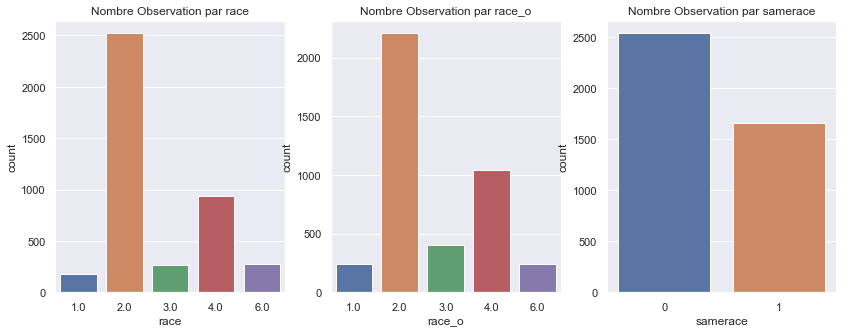

In [5]:
plt.figure(1, figsize=(14,5))
plt.subplot(131)
sns.countplot(data_men['race'])
plt.title('Nombre Observation par race')
plt.subplot(132)
sns.countplot(data_men['race_o'])
plt.title('Nombre Observation par race_o')
plt.subplot(133)
sns.countplot(data_men['samerace'])
plt.title('Nombre Observation par samerace')
plt.show()

## Création d'un dataframe avec une ligne par match

In [48]:
# Import data
import pandas as pd
import numpy as np
import json
df = pd.read_csv("data/SpeedDating.csv", encoding="Latin-1")
df_match = df[df.match == 1].copy()
df_match.dropna(subset=["race", "goal", "field_cd","from", "career_c", "attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"], inplace=True)
df_match.reset_index(drop=True, inplace=True)
list_key_date = [str(int(df_match.loc[x, 'iid'])) + "_" + str(int(df_match.loc[x, "pid"])) + "_" + str(df_match.loc[x, "wave"]) if int(df_match.loc[x, "iid"])>int(df_match.loc[x, "pid"]) else str(int(df_match.loc[x, 'pid']))  + "_" + str(int(df_match.loc[x, "iid"])) + "_" + str(df_match.loc[x, "wave"]) for x in range(df_match.shape[0])]
df_match["key_date"] = list_key_date
# Split men/women to take attributes from the two tables
df_men = df_match[df_match.gender==1].loc[:, ["key_date", "race", "goal", "field_cd", "from", "career_c", "attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]].copy()
df_women = df_match[df_match.gender==0].loc[:, ["key_date", "race", "goal", "field_cd", "from", "career_c", "attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]].copy()
df_res = df_men.merge(df_women, how="inner", on="key_date", suffixes=('_H', '_F'))

In [49]:
# Process cities
cities = set(df_res["from_H"].tolist() + df_res["from_F"].tolist())
dict_from = dict(zip(cities, range(len(cities))))
df_res["from_H"] = df_res["from_H"].apply(lambda x: dict_from[x])
df_res["from_F"] = df_res["from_F"].apply(lambda x: dict_from[x])
# Process all fields
for attribute in df_res.columns[1:]:
    df_res[attribute] = df_res[attribute].apply(lambda x: int(x))

In [50]:
# Normalisation des données
list_divide_100 = ["attr1_1_F", "sinc1_1_F",  "intel1_1_F", "fun1_1_F", "amb1_1_F", "attr1_1_H", "sinc1_1_H",  "intel1_1_H", "fun1_1_H", "amb1_1_H"]
list_divide_10 = ["attr5_1_H", "sinc5_1_H", "intel5_1_H", "fun5_1_H", "amb5_1_H", "attr3_1_H", "sinc3_1_H", "intel3_1_H", "fun3_1_H", "amb3_1_H", "attr5_1_F", "sinc5_1_F", "intel5_1_F", "fun5_1_F", "amb5_1_F", "attr3_1_F", "sinc3_1_F", "intel3_1_F", "fun3_1_F", "amb3_1_F"]
for i in range(df_res.shape[0]):
#     wave = int(df_res.iloc[i]['key_date'].split('_')[-1])
    df_res.loc[i, list_divide_100] = df_res.loc[i, list_divide_100].copy()/100
    df_res.loc[i, list_divide_10] = df_res.loc[i, list_divide_10].copy()/10

In [51]:
list_attributes = ["attr1_1", "sinc1_1",  "intel1_1", "fun1_1", "amb1_1", "attr5_1", "sinc5_1", "intel5_1", "fun5_1", "amb5_1", "attr3_1", "sinc3_1", "intel3_1", "fun3_1", "amb3_1"]
list_attributes_H = [x+"_H" for x in list_attributes]
list_attributes_F = [x+"_F" for x in list_attributes]
list_attributes = list_attributes_H + list_attributes_F

In [52]:
df_res.head()

,key_date,race_H,goal_H,field_cd_H,from_H,career_c_H,attr1_1_H,sinc1_1_H,intel1_1_H,fun1_1_H,...,attr5_1_F,sinc5_1_F,intel5_1_F,fun5_1_F,amb5_1_F,attr3_1_F,sinc3_1_F,intel3_1_F,fun3_1_F,amb3_1_F
0,243_235_10,2,2,16,115,2,0.20,0.2,0.2,0.25,...,0.6,0.9,0.9,0.9,0.9,0.6,0.9,0.8,0.9,0.9
1,243_241_10,2,2,16,115,2,0.20,0.2,0.2,0.25,...,0.8,1.0,0.8,0.8,0.8,0.8,1.0,0.8,0.8,0.8
2,243_242_10,2,2,16,115,2,0.20,0.2,0.2,0.25,...,0.7,0.9,0.8,0.7,0.8,0.7,0.9,0.8,0.7,0.4
3,244_238_10,2,2,8,19,7,0.20,0.2,0.2,0.10,...,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.9,1.0,0.8
4,245_239_10,2,4,7,80,1,0.18,0.1,0.3,0.10,...,0.7,1.0,0.8,0.7,0.7,0.7,0.9,0.9,0.7,0.4


In [59]:
def get_data_radar_row(dict_temp):
        # START
        expected_source = { 'Attractive': dict_temp["attr1_1_F"],
                    'Sincere': dict_temp["sinc1_1_F"],
                    'Intelligent':dict_temp["intel1_1_F"],
                    'Fun': dict_temp["fun1_1_F"],
                    'Ambitious': dict_temp["amb1_1_F"]}
        perceive_source = { 'Attractive':dict_temp["attr5_1_H"],
                    'Sincere':dict_temp["sinc5_1_H"],
                    'Intelligent':dict_temp["intel5_1_H"],
                    'Fun':dict_temp["fun5_1_H"],
                    'Ambitious':dict_temp["amb5_1_H"]}
        ownView_source = { 'Attractive':dict_temp["attr3_1_H"],
                    'Sincere':dict_temp["sinc3_1_H"],
                    'Intelligent':dict_temp["intel3_1_H"],
                    'Fun':dict_temp["fun3_1_H"],
                    'Ambitious':dict_temp["amb3_1_H"]}
        # TARGET
        expected_target = { 'Attractive': dict_temp["attr1_1_H"],
                        'Sincere': dict_temp["sinc1_1_H"],
                        'Intelligent':dict_temp["intel1_1_H"],
                        'Fun': dict_temp["fun1_1_H"],
                        'Ambitious': dict_temp["amb1_1_H"]}
        perceive_target = { 'Attractive':dict_temp["attr5_1_F"],
                        'Sincere':dict_temp["sinc5_1_F"],
                        'Intelligent':dict_temp["intel5_1_F"],
                        'Fun':dict_temp["fun5_1_F"],
                        'Ambitious':dict_temp["amb5_1_F"]}
        ownView_target = { 'Attractive':dict_temp["attr3_1_F"],
                        'Sincere':dict_temp["sinc3_1_F"],
                        'Intelligent':dict_temp["intel3_1_F"],
                        'Fun':dict_temp["fun3_1_F"],
                        'Ambitious':dict_temp["amb3_1_F"]}
        list_expected_source = []
        list_perceive_source = []
        list_ownView_source = []
        
        list_expected_target = []
        list_perceive_target = []
        list_ownView_target = []
        
        for i in expected_source.keys():
            list_expected_source.append({"axis": i, "value": expected_source[i], "opinion": "test"})
            list_perceive_source.append({"axis": i, "value": perceive_source[i], "opinion" : "test"})
            list_ownView_source.append({"axis": i, "value": ownView_source[i], "opinion" : "test"})
            
            list_expected_target.append({"axis": i, "value": expected_target[i], "opinion" : "test1"})
            list_perceive_target.append({"axis": i, "value": perceive_target[i], "opinion" : "test2"})
            list_ownView_target.append({"axis": i, "value": ownView_target[i], "opinion" : "test3"})
        
        res = {}
        source = {"expected" : list_expected_source, "perceive" : list_perceive_source, "ownView" : list_ownView_source}
        target = {"expected" : list_expected_target, "perceive" : list_perceive_target, "ownView" : list_ownView_target}
        
        res["source"] = source
        res["target"] = target
        
        return res

In [62]:
dict_global = {}
for attribute_H in ["race", "goal", "field_cd","from", "career_c"]:
    for attribute_F in ["race", "goal", "field_cd","from", "career_c"]:
        df_attributes = df_res.groupby([attribute_H+"_H", attribute_F+"_F"]).mean().loc[:, list_attributes]
        dict_comparison = {}
        for i in range(df_attributes.shape[0]):
            dict_temp = {}
            df_temp = df_attributes.iloc[i,:]
            dict_temp = dict(zip(df_temp.index, df_temp.values))
            dict_comparison[str(df_temp.name[0])+"_"+str(df_temp.name[1])] = get_data_radar_row(dict_temp)
        dict_global[attribute_H+'_'+attribute_F] = dict_comparison

In [63]:
with open("data_radar_legend.json", 'w', encoding='utf-8') as outfile:
        json.dump(dict_global, outfile)